<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_07_Entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
!pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import qiskit as qk
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.tools.visualization import plot_bloch_multivector
import qiskit.tools.jupyter
%matplotlib inline
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [4]:
quantum_simulator = qk.Aer.get_backend("qasm_simulator")
state_vector_simulator = qk.Aer.get_backend("statevector_simulator")

## Circuito con il qubit 0 in sovrapposizione di stati e il qubit 1 nello stato |up>

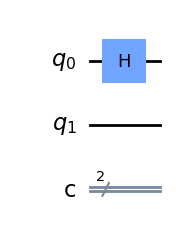

In [24]:
circuit = qk.QuantumCircuit(2, 2)
circuit.h(0)
circuit.draw(output="mpl")

In [25]:
job = qk.execute(circuit, backend=state_vector_simulator)
result = job.result()
state_vector = result.get_statevector()
array_to_latex(state_vector, prefix="\t{StateVector =}")

<IPython.core.display.Latex object>

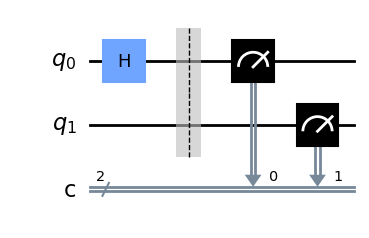

In [26]:
circuit = qk.QuantumCircuit(2, 2)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output="mpl")

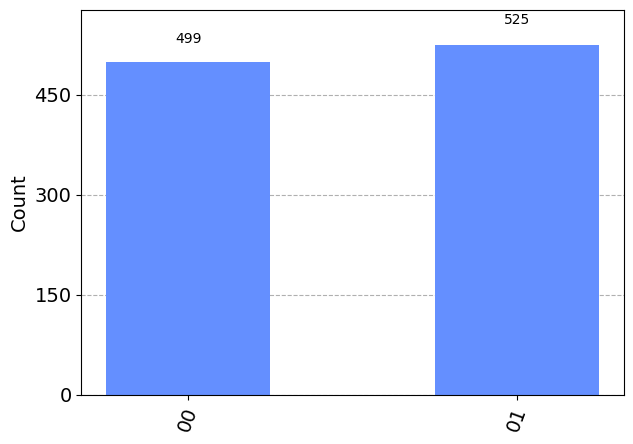

In [27]:
job = qk.execute(circuit, backend=quantum_simulator, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

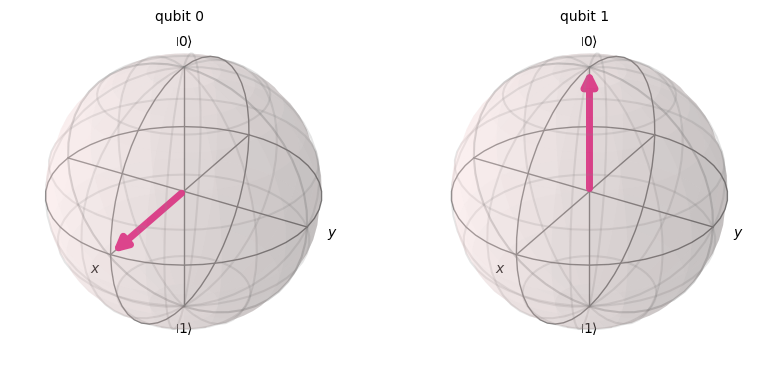

In [28]:
plot_bloch_multivector(state_vector)

## Circuito con il qubit 0 in sovrapposizione di stati e il qubit 1 in entanglement con 0


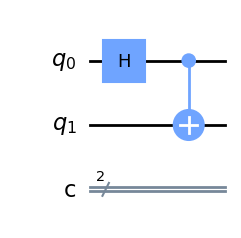

In [30]:
circuit = qk.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cnot(0, 1)
circuit.draw(output="mpl")

In [31]:
job = qk.execute(circuit, backend=state_vector_simulator)
result = job.result()
state_vector = result.get_statevector()
array_to_latex(state_vector, prefix="\t{StateVector =}")

<IPython.core.display.Latex object>

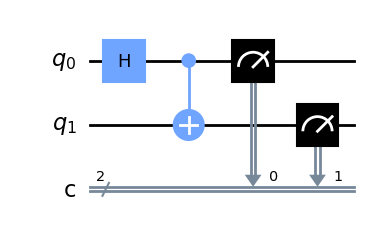

In [32]:
circuit = qk.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cnot(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw(output="mpl")

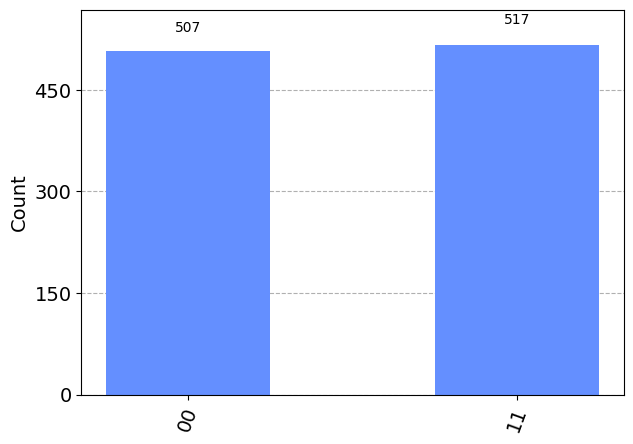

In [33]:
job = qk.execute(circuit, backend=quantum_simulator, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

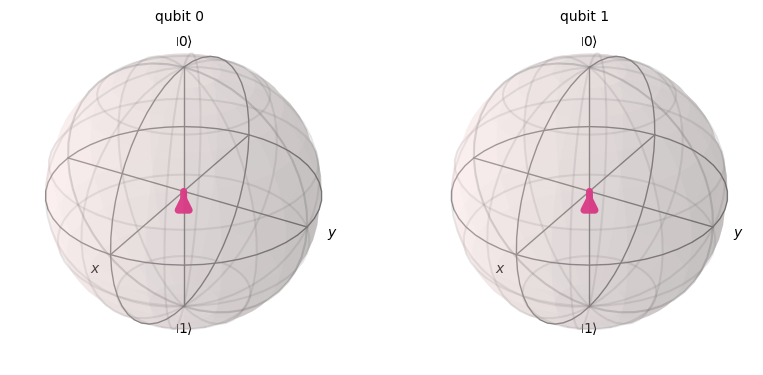

In [34]:
plot_bloch_multivector(state_vector)